In [21]:
import folium as fm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
latnlng = pd.read_csv('latnlng.csv')
street_names = pd.read_excel('./input/st_name.xls')
latnlng = pd.merge(street_names, latnlng, on='STREET_NAME')
latnlng = latnlng.rename(columns={'STREET_NO': 'ST_NM'})

In [5]:
acc_cas, acc_veh = {}, {}
for i in range(2012, 2017):
    idx = str(i)
    acc_cas[idx] = pd.read_excel('./input/{0}/Acc_cas {0}.xls'.format(idx))
    acc_veh[idx] = pd.read_excel('./input/{0}/Acc_veh {0}.xls'.format(idx))
    print('The Year %s is read.' % idx)

The Year 2012 is read.
The Year 2013 is read.
The Year 2014 is read.
The Year 2015 is read.
The Year 2016 is read.


In [6]:
acc_loc = {}
for e, i in enumerate(range(2012, 2017)):
    idx = str(i)
    acc = acc_cas[idx][['SEVERITY', 'ST_NM']].copy()
    acc_loc[idx] = pd.merge(acc, latnlng, on='ST_NM').dropna()
    print('The Year %s is read.' % idx)

The Year 2012 is read.
The Year 2013 is read.
The Year 2014 is read.
The Year 2015 is read.
The Year 2016 is read.


In [51]:
#m = fm.Map(location=[22.3964, 114.1095], zoom_start=13)

In [52]:
# all
#for row in acc_loc['2012'].iterrows():
#    color = color_list[(row[1].SEVERITY - 1)]
#    lat = row[1].LAT + np.rint(np.random.uniform(-20, 20))*1e-6
#    lng = row[1].LNG + np.rint(np.random.uniform(-20, 20))*1e-6
#    fm.CircleMarker(location=[lat, lng], radius=1,
#                   popup=row[1].STREET_NAME, color=color).add_to(m)

In [1]:
# m

In [9]:
# fatal,
#acc_loc1 = acc_loc['2012'][acc_loc['2012'].SEVERITY == 1]
#acc_loc2 = acc_loc['2012'][acc_loc['2012'].SEVERITY == 2]
#acc_loc3 = acc_loc['2012'][acc_loc['2012'].SEVERITY == 3]

In [13]:
# fatal
#m = fm.Map(location=[22.3964, 114.1095], zoom_start=13)

In [15]:
#for row in acc_loc1.iterrows():
#    color = color_list[0]
#    lat = row[1].LAT + np.rint(np.random.uniform(-20, 20))*1e-6
#    lng = row[1].LNG + np.rint(np.random.uniform(-20, 20))*1e-6
#    fm.CircleMarker(location=[lat, lng], radius=1,
#                    popup=row[1].STREET_NAME, color=color).add_to(m)

In [160]:
shape_list = ['o', 'D', 'H']
color_list = ['#ff0000', '#00ff00', '#0000ff']

In [161]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', lat_0=22.40, lon_0=114.12,
            resolution='h', llcrnrlon=113.82, llcrnrlat=22.10,
            urcrnrlon=114.42, urcrnrlat=22.70)

In [162]:
m.drawcoastlines()
m.drawmapboundary(color='black', fill_color='aqua', zorder=999)
m.fillcontinents(color='coral', lake_color='aqua', zorder=0)

/usr/local/lib/python3.5/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


In [163]:
acc_loc1 = acc_loc['2012'][acc_loc['2012'].SEVERITY == 1]
acc_loc2 = acc_loc['2012'][acc_loc['2012'].SEVERITY == 2]
acc_loc3 = acc_loc['2012'][acc_loc['2012'].SEVERITY == 3]
acc_loc_list = [acc_loc1, acc_loc2, acc_loc3]

In [164]:
for acc_loc0, marker, color in zip(acc_loc_list, shape_list, color_list):
    lons = acc_loc0.LNG.values
    lats = acc_loc0.LAT.values
    x, y = m(lons, lats)
    m.scatter(x, y, marker=marker, color=color)

/usr/local/lib/python3.5/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.5/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


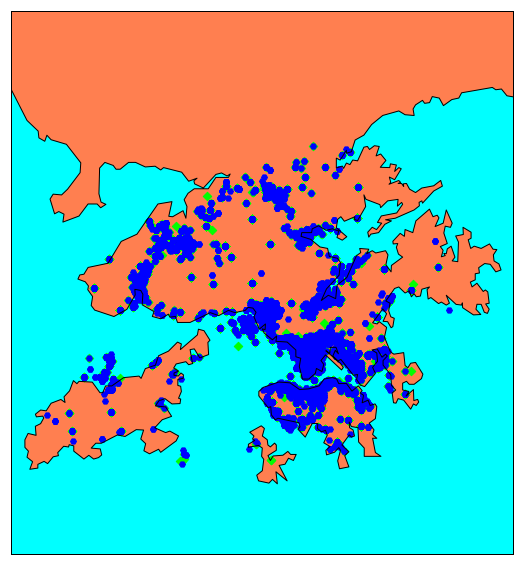

In [165]:
plt.show()